In [1]:
import cv2
import numpy as np
import scipy.misc
from matplotlib import pyplot as plt
import pandas as pd
import pickle
import umap
#import plottools
import numpy.ma as ma

In [88]:
def frames_vector(vid_path, edge_threshold1 = 100, edge_threshold2 = 200):
    
    "Returns numpy array images_colour of dimensions (n_f, n_H, n_W, n_C)"
    "numpy array images of dimensions (n_f, n_H, n_W)"
    "n_f = number of frames "
    "n_H = number of pixels vertically per frame"
    "n_W = number of pixels horizontally per frame"
    "n_C = number of channels per frame (RBG)"
    
    vidcap = cv2.VideoCapture(vid_path)
    n_f = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    success, image = vidcap.read()
    n_H, n_W, n_C = image.shape[0], image.shape[1], image.shape[2]
    images = np.zeros([n_f, n_H, n_W])
    images_colour = np.zeros([n_f, n_H, n_W, n_C])
    images_edge = np.zeros([n_f, n_H, n_W])
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edge_image = cv2.Canny(image, edge_threshold1, edge_threshold2)
    
    count = 0
    images[count,:,:] = gray_image
    images_colour[count,:,:,:] = image
    images_edge[count,:,:] = edge_image
    success = True
    
    while success:
        count += 1
        success, image = vidcap.read()
        if success:
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            edge_image = cv2.Canny(image, edge_threshold1, edge_threshold2)
            images[count,:,:] = gray_image
            images_colour[count,:,:,:] = image
            images_edge[count,:,:] = edge_image
        
    assert images.shape == (n_f, n_H, n_W)
    assert images_colour.shape == (n_f, n_H, n_W, n_C)
    assert images_edge.shape == (n_f, n_H, n_W)
    
    #return images_colour, images, images_edge, n_f, n_H, n_W, n_C
    return images_edge, n_f, n_H, n_W, n_C

In [164]:
def frames_edges(vid_path, edge_threshold1 = 100, edge_threshold2 = 200):
    
    "numpy array images of dimensions (n_f, n_H, n_W)"
    "n_f = number of frames "
    "n_H = number of pixels vertically per frame"
    "n_W = number of pixels horizontally per frame"
    "n_C = number of channels per frame (RBG)"
    
    vidcap = cv2.VideoCapture(vid_path)
    n_f = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    success, image = vidcap.read()
    n_H, n_W, n_C = image.shape[0], image.shape[1], image.shape[2]
    images_edge = np.zeros([n_f, n_H, n_W])
    edge_image = cv2.Canny(image, edge_threshold1, edge_threshold2)
    
    count = 0
    images_edge[count,:,:] = edge_image
    success = True
    
    while success:
        count += 1
        success, image = vidcap.read()
        if success:
            edge_image = cv2.Canny(image, edge_threshold1, edge_threshold2)
            images_edge[count,:,:] = edge_image
        
    assert images_edge.shape == (n_f, n_H, n_W)

    return images_edge.astype(int), n_f, n_H, n_W, n_C

In [11]:
frames_edge, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/8.avi', 64, 64)

In [404]:
frames_edge.shape

(245, 720, 1280)

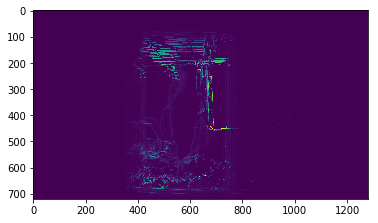

In [15]:
plt.imshow(frames_edge.mean(axis=0))

## Execute

Load umap model

In [16]:
reducer = pickle.load(open('umap_200_0.sav', 'rb'))

In [17]:
window_size, window_stride = 60, 1

In [10]:
all_windows = get_all_windows('/home/pn/Desktop/post_deeplabcut/batch1/interpolated/', window_size, window_stride)

/home/pn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [11]:
all_windows.shape

(210369, 60, 10)

In [12]:
data = np.reshape(all_windows, (len(all_windows), 600))

In [506]:
%time embedding = reducer.transform(data)

NameError: name 'data' is not defined

Plot and zoom into region of interest

In [505]:
plt.figure(figsize=(20, 20))
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.9, s=10)
plt.axis([7.95,8.1,-2.85,-2.775])

#fig, ax = plt.subplots()
#ax.scatter(embedding[:, 0], embedding[:, 1], alpha=0.9, s=10)
#ax_zoom = plottools.zoom_axes(fig, ax, [7.8,8.3], [-3.0,-2.6], [5,5], [5,5])
#ax_zoom.plot(embedding[:, 0], embedding[:, 1])
#plt.show()

NameError: name 'embedding' is not defined

<Figure size 1440x1440 with 0 Axes>

Define Region of interest

In [22]:
box_dict = {}
x_min, x_max, y_min, y_max = 7.95,8.1,-2.85,-2.775

In [28]:
%time box_dict = get_vid_frame_index('/home/pn/Desktop/post_deeplabcut/batch1/interpolated/', box_dict, reducer, x_min, x_max, y_min, y_max, window_size=60, window_stride=1)

/home/pn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


/home/pn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


CPU times: user 6h 40min 59s, sys: 1min 26s, total: 6h 42min 25s
Wall time: 28min 6s


In [134]:
vid = 1965

In [140]:
frames_edge, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', 32, 32)

In [136]:
frames_edge.shape

(245, 720, 1280)

In [61]:
frames_edge[box_dict['vid_'+str(vid)]+0].shape

(186, 720, 1280)

In [67]:
frames_edge[box_dict['vid_'+str(vid)]+0].mean(axis=0).shape

(720, 1280)

In [93]:
first= frames_edge[box_dict['vid_'+str(vid)]+0].mean(axis=0)

In [94]:
second = frames_edge[box_dict['vid_'+str(vid)]+0].mean(axis=0)

In [95]:
third = frames_edge[box_dict['vid_'+str(vid)]+0].mean(axis=0)

In [97]:
stack = np.stack((first, second, third))

In [98]:
stack.shape

(3, 720, 1280)

In [39]:
stack_edges = np.stack(frames_edge[box_dict['vid_'+str(vid)]+i].mean(axis=0) for i in range(0, n_f-(window_size-1), window_stride))

/home/pn/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2901: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [40]:
stack_edges.shape

(186, 720, 1280)

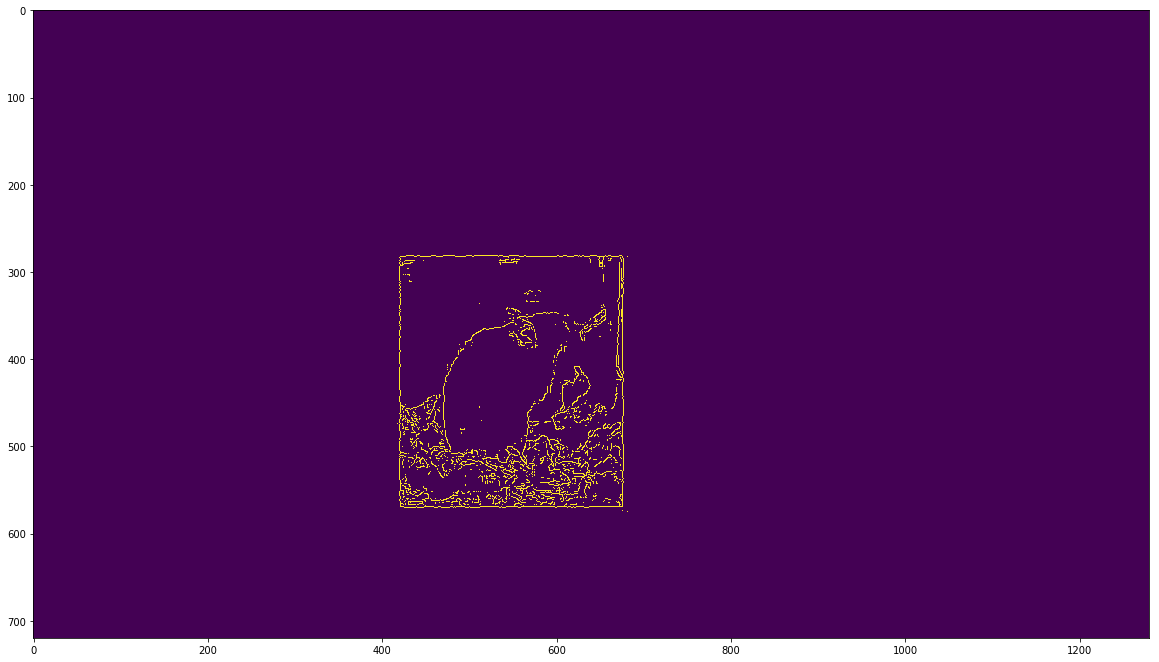

In [141]:
plt.figure(figsize=(20,20))
plt.imshow(frames_edge[100])

In [185]:
vid = 1965

In [186]:
%time edges_average = video_to_window('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/', vid, box_dict, window_size=60, window_stride=1)

CPU times: user 34 s, sys: 22.5 s, total: 56.5 s
Wall time: 42.8 s


In [187]:
vid = 2349

In [188]:
%time edges_average1 = video_to_window('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/', vid, box_dict, window_size=60, window_stride=1)

CPU times: user 43.6 s, sys: 27.6 s, total: 1min 11s
Wall time: 53.4 s


In [189]:
edges_average.shape

(60, 720, 1280)

In [190]:
edges_average1.shape

(60, 720, 1280)

In [204]:
np.zeros((60, 720, 1200)).shape

(60, 720, 1200)

In [184]:
videos_list = list(pd.read_csv('/home/pn/Desktop/post_deeplabcut/batch1/best_list.csv').iloc[:, 1])

edge_frames = np.zeros((60, 720, 1200))
for vid in videos_list:
    print(str(vid) + "/" + str(videos_list[-1:]), end="\r")

    video_edges = video_to_window('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/', vid, box_dict, window_size=60, window_stride=1)
    edge_frames += video_edges
edges_average = np.stack(edge_frames)

int6499]
Memory Error, quiting video 5
int64
Memory Error, quiting video 8
int64
Memory Error, quiting video 28


KeyboardInterrupt: 

In [122]:
edges_average = np.stack(edge_frames)

In [123]:
edges_average.shape

(38, 60, 720, 1280)

In [125]:
images = edges_average.mean(axis=0)

In [213]:
vid = 8

In [214]:
video = video_to_window('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/', vid, box_dict, window_size=60, window_stride=1)

In [154]:
frames_edge.shape

(6466, 720, 1280)

In [169]:
frames_edge.dtype

dtype('int64')

In [176]:
frames_edge[0].mean(dtype=int)

1

In [156]:
box_dict['vid_'+str(vid)].shape

(6407,)

In [211]:
video.shape

(60, 720, 1280)

In [219]:
frames_edge, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', 32, 32)

In [221]:
box_dict['vid_8'].shape

(218,)

In [220]:
frames_edge[box_dict['vid_'+str(vid)]]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 277 but corresponding boolean dimension is 218

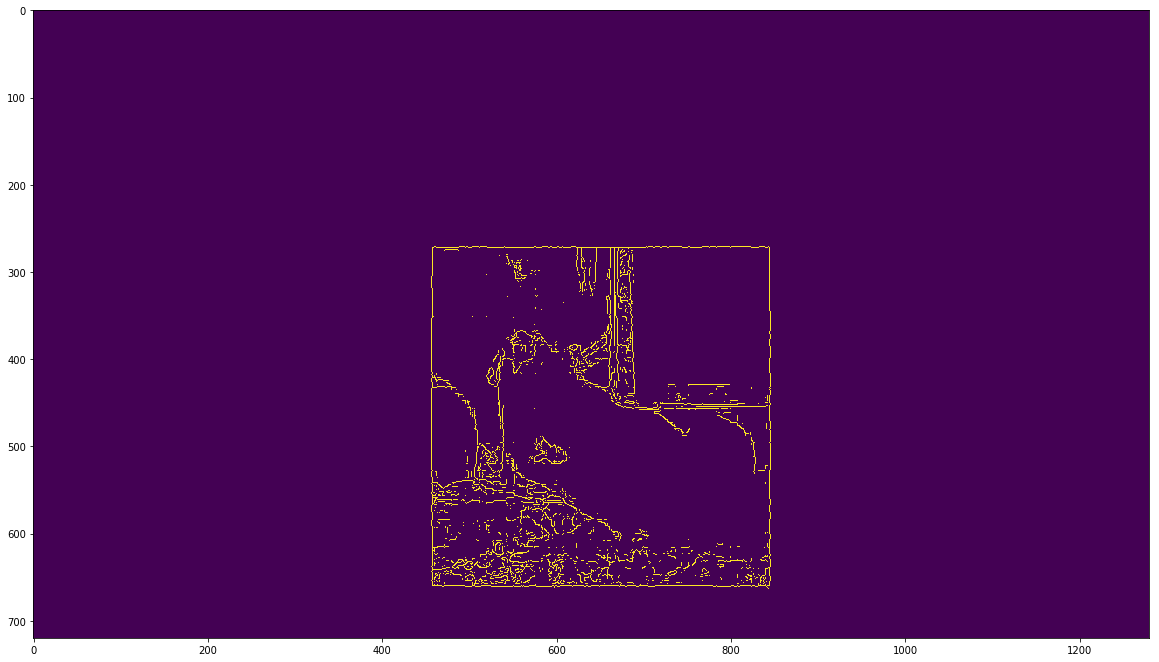

In [215]:
plt.figure(figsize=(20,20))
plt.imshow(video[0])

In [48]:
edges_average.shape

(60, 720, 1280)

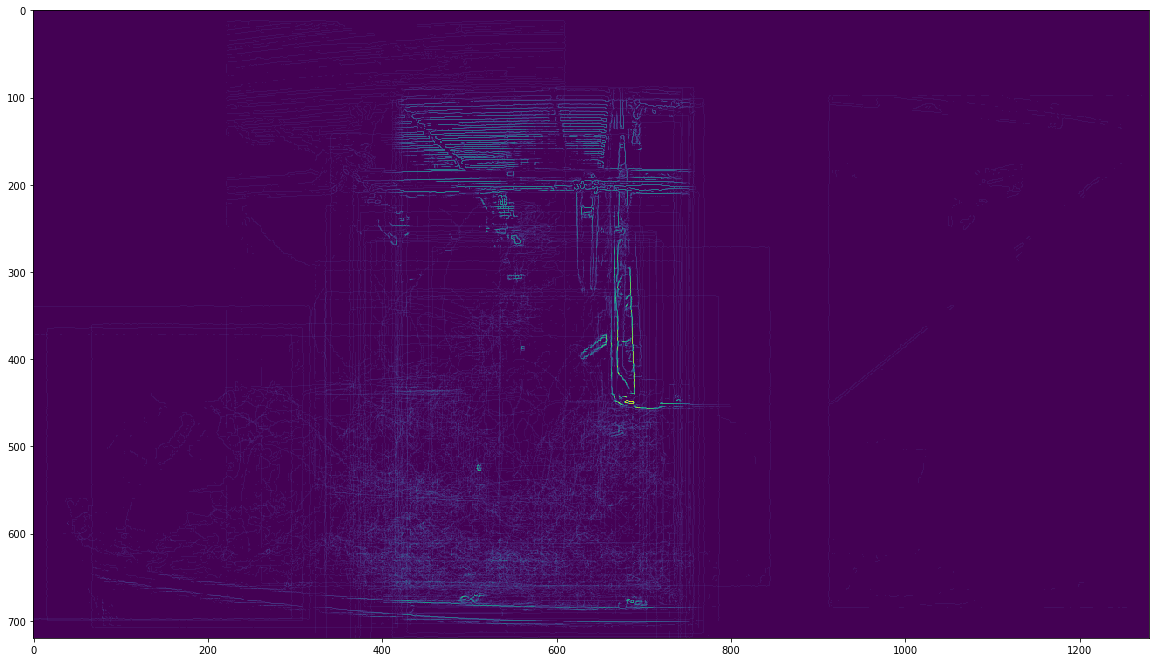

In [147]:
plt.figure(figsize=(20,20))
plt.imshow(images[0])

In [393]:
writer = cv2.VideoWriter('test.avi', cv2.VideoWriter_fourcc(*'PIM1'), 25, (720, 1200), True)
for image in images:
    writer.write(image)

error: OpenCV(4.1.0) /io/opencv/modules/videoio/src/cap_ffmpeg.cpp:298: error: (-215:Assertion failed) image.depth() == CV_8U in function 'write'


In [ ]:
stack_edges = video_to_window('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/5.avi', window_size=60, window_stride=1)

In [ ]:
stack_edges[box_dict['vid_4']].shape

In [197]:
box_dict['vid_4']

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False,

In [202]:
for key in box_dict:
    print(key, box_dict[key].sum())

vid_4 6
vid_5 22
vid_8 0
vid_28 0
vid_74 0
vid_215 0
vid_217 0
vid_218 0
vid_232 0
vid_374 0
vid_428 0
vid_430 0
vid_453 0
vid_462 0
vid_463 0
vid_546 0
vid_653 0
vid_655 0
vid_656 0
vid_658 0
vid_659 0
vid_660 0
vid_661 0
vid_663 0
vid_664 0
vid_665 0
vid_666 0
vid_667 0
vid_668 0
vid_712 0
vid_728 0
vid_731 0
vid_811 0
vid_874 0
vid_901 0
vid_902 0
vid_905 0
vid_906 0
vid_907 0
vid_1037 0
vid_1052 0
vid_1053 0
vid_1054 0
vid_1055 0
vid_1056 0
vid_1057 0
vid_1058 0
vid_1062 0
vid_1065 0
vid_1067 0
vid_1068 0
vid_1069 0
vid_1070 0
vid_1071 0
vid_1072 0
vid_1073 0
vid_1074 0
vid_1091 0
vid_1093 0
vid_1094 0
vid_1134 0
vid_1135 0
vid_1136 0
vid_1175 0
vid_1176 0
vid_1177 0
vid_1178 0
vid_1179 1
vid_1180 0
vid_1181 0
vid_1182 0
vid_1183 0
vid_1184 0
vid_1185 0
vid_1186 0
vid_1187 0
vid_1190 0
vid_1191 0
vid_1192 0
vid_1193 0
vid_1236 0
vid_1237 0
vid_1239 0
vid_1244 0
vid_1245 0
vid_1260 121
vid_1353 0
vid_1354 0
vid_1356 0
vid_1357 0
vid_1359 0
vid_1361 0
vid_1362 0
vid_1363 0
vid_1364 0

## Functions

In [212]:
def video_to_window(file_path, vid, box_dict, window_size=60, window_stride=1):
    
    "Arguments: -Path to video file"
    "           -Size of sliding window"
    "           -Stride of sliding windows"
    "Returns:   -Array of dimensions:"
    "stack_colours  num_windows, window_size, n_H, n_W, n_C"    
    "stack_edges  num_windows, window_size, n_H, n_W" 
    
    frames_edge, n_f, n_H, n_W, n_C = frames_edges(file_path+str(vid)+'.avi', 32, 32)

    #stack_colours = np.stack(frames_colour[i:i+window_size] for i in range(0, n_f-(window_size-1), window_stride))
    #stack_edges = np.stack(frames_edge[i:i+window_size] for i in range(0, n_f-(window_size-1), window_stride))
    #stack_edges = stack_edges[box_dict['vid_'+str(vid)]].mean(axis=0)
    
    edges = []
    try:
        for i in range(0, window_size):
            edges.append(frames_edge[box_dict['vid_'+str(vid)]+i].sum(axis=0, dtype=int))
    except:
        print('Memory Error, quiting video ' + str(vid))
        
    stack_edges = np.stack(edges)
                   
    return stack_edges

In [25]:
def time_series_to_window(file_path, window_size=60, window_stride=1):
    
    "Arguments: -Path to time series csv file"
    "           -Size of sliding window"
    "           -Stride of sliding windows"
    "Returns:   -Array of dimensions:"
    " n          num_windows, window_size, num_features"
    "ALSO MAKES SPATIALLY INDEPENDENT USING CENTROID"
  
    data = pd.read_csv(file_path)
    n_rows, _ = data.shape
    
    features = ['leftear_x', 'leftear_y', 'rightear_x', 'rightear_y', 'nose_x', 'nose_y', 'lefthand_x', 'lefthand_y', 'righthand_x', 'righthand_y',]
    # 
    x_features = ['leftear_x', 'rightear_x', 'nose_x', 'lefthand_x', 'righthand_x']
    y_features = ['leftear_y', 'rightear_y', 'nose_y', 'lefthand_y', 'righthand_y']
    
    x_data = data[x_features]
    data['leftear_x'] = x_data['leftear_x'] - x_data.mean(axis=1)
    data['rightear_x'] = x_data['rightear_x'] - x_data.mean(axis=1)
    data['nose_x'] = x_data['nose_x'] - x_data.mean(axis=1)
    data['lefthand_x'] = x_data['lefthand_x'] - x_data.mean(axis=1)
    data['righthand_x'] = x_data['righthand_x'] - x_data.mean(axis=1)

    y_data = data[y_features]
    data['leftear_y'] = y_data['leftear_y'] - y_data.mean(axis=1)
    data['rightear_y'] = y_data['rightear_y'] - y_data.mean(axis=1)
    data['nose_y'] = y_data['nose_y'] - y_data.mean(axis=1)
    data['lefthand_y'] = y_data['lefthand_y'] - y_data.mean(axis=1)
    data['righthand_y'] = y_data['righthand_y'] - y_data.mean(axis=1)
    
    stack = np.stack(data[features].iloc[i:i+window_size] for i in range(0, n_rows-(window_size-1), window_stride))
    
    return stack

In [26]:
def get_all_windows(time_series_path, window_size=60, window_stride=1):
    
    videos_list = list(pd.read_csv('/home/pn/Desktop/post_deeplabcut/batch1/best_list.csv').iloc[:, 1])
    
    first_run = True
    for vid in videos_list:
        print(str(vid) + "/" + str(videos_list[-1:]), end="\r")
        if first_run:
            all_windows = time_series_to_window(time_series_path + str(vid) + '.csv', window_size, window_stride)
            #all_windows_images = video_to_window(video_path + str(vid) + '.avi', window_size=60, window_stride=1)
            first_run = False
            continue
        windows = time_series_to_window(time_series_path + str(vid) + '.csv', window_size, window_stride)
        #windows_images = video_to_window(video_path + str(vid) + '.csv', window_size=60, window_stride=1)
        all_windows = np.concatenate((all_windows, windows), axis=0)
        #all_windows_images = np.concatenate((all_windows_images, windows_images), axis=0)
        
    return all_windows#, all_windows_images

In [224]:
def get_vid_frame_index(time_series_path, box_dict, reducer, x_min, x_max, y_min, y_max, window_size=60, window_stride=1):
    
    videos_list = list(pd.read_csv('/home/pn/Desktop/post_deeplabcut/batch1/best_list.csv').iloc[:, 1])
    
    first_run = True
    for vid in videos_list:
        print(str(vid) + "/" + str(videos_list[-1:]), end="\r")
        video_data = time_series_to_window(time_series_path + str(vid) + '.csv', window_size, window_stride)
        
        video_data = np.reshape(video_data, (len(video_data), 600))
        video_embedding = reducer.transform(video_data)
        
        box_set = (video_embedding[:, 0] >= x_min) & (video_embedding[:, 0] <= x_max) & (video_embedding[:, 1] >= y_min) & (video_embedding[:, 1] <= y_max)
        
        box_dict['vid_'+str(vid)] = box_set
        
    return box_dict

In [236]:
vid = 4

In [237]:
video_data = time_series_to_window('/home/pn/Desktop/post_deeplabcut/batch1/interpolated/' + str(vid) + '.csv', window_size, window_stride)

/home/pn/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [238]:
video_data.shape

(199, 60, 10)

In [239]:
video_data = np.reshape(video_data, (len(video_data), 600))
video_embedding = reducer.transform(video_data)

In [240]:
box_set = (video_embedding[:, 0] >= x_min) & (video_embedding[:, 0] <= x_max) & (video_embedding[:, 1] >= y_min) & (video_embedding[:, 1] <= y_max)

In [241]:
box_set == True

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False,

In [242]:
frames_edge, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', 32, 32)

In [243]:
frames_edge.shape

(258, 720, 1280)

In [257]:
frames_edge[:len(box_set)][box_set].mean(axis=0).shape

(720, 1280)

In [254]:
len(box_set)

199

In [ ]:
def average_vid_from_range(reducer, x_min, x_max, y_min, y_max):
    mean_vids = np.zeros((60, 720, 1280))
    videos_list = list(pd.read_csv('/home/pn/Desktop/post_deeplabcut/batch1/best_list.csv').iloc[:, 1])

    for vid in videos_list:
        print(str(vid) + "/" + str(videos_list[-1:]), end="\r")

        video_data = time_series_to_window('/home/pn/Desktop/post_deeplabcut/batch1/interpolated/' + str(vid) + '.csv', window_size, window_stride)

        video_data = np.reshape(video_data, (len(video_data), 600))
        video_embedding = reducer.transform(video_data)

        box_set = (video_embedding[:, 0] >= x_min) & (video_embedding[:, 0] <= x_max) & (video_embedding[:, 1] >= y_min) & (video_embedding[:, 1] <= y_max)

        if not any(box_set):
            continue

        try:
            frames_edge, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', 32, 32)
        except:
            print('Video of size ' + str(n_f) + ' is too large..')
            continue

        frame_list = []
        for i in range(0, window_size):
            try:
                frame_list.append(frames_edge[i:i+len(box_set)][box_set].mean(axis=0, dtype=int))
            except:
                print('Video of size ' + str(n_f) + ' is too large..')
                continue
        mean_vid = np.stack(frame_list)
        mean_vids += mean_vid
        
    return mean_vids

In [44]:
box_set = [True, False, True]

In [47]:
np.sum(box_set)

2

In [317]:
x_min, x_max, y_min, y_max = 7.95,8.1,-2.85,-2.775

In [323]:
mean_vids = np.zeros((60, 720, 1280))
videos_list = list(pd.read_csv('/home/pn/Desktop/post_deeplabcut/batch1/best_list.csv').iloc[:, 1])
    
for vid in videos_list:
    print(str(vid) + "/" + str(videos_list[-1:]), end="\r")
    
    video_data = time_series_to_window('/home/pn/Desktop/post_deeplabcut/batch1/interpolated/' + str(vid) + '.csv', window_size, window_stride)

    video_data = np.reshape(video_data, (len(video_data), 600))
    video_embedding = reducer.transform(video_data)

    box_set = (video_embedding[:, 0] >= x_min) & (video_embedding[:, 0] <= x_max) & (video_embedding[:, 1] >= y_min) & (video_embedding[:, 1] <= y_max)

    if not any(box_set):
        continue
        
    try:
        frames_edge, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', 32, 32)
    except:
        print('Video of size ' + str(n_f) + ' is too large..')
        continue
            
    frame_list = []
    for i in range(0, window_size):
        try:
            frame_list.append(frames_edge[i:i+len(box_set)][box_set].mean(axis=0, dtype=int))
        except:
            print('Video of size ' + str(n_f) + ' is too large..')
            continue
    mean_vid = np.stack(frame_list)
    mean_vids += mean_vid

/home/pn/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


MemoryError: Unable to allocate array with shape (7046, 720, 1280) and data type float64

In [326]:
mean_vids.shape

(60, 720, 1280)

In [329]:
mean_vids[0].sum()

30934179.0

In [299]:
mean_vid.sum()

4948244.09090909

In [301]:
box_set.shape

(161,)

In [411]:
my_vids = mean_vids

In [304]:
frames_edge[i:i+len(box_set)].shape

(161, 720, 1280)

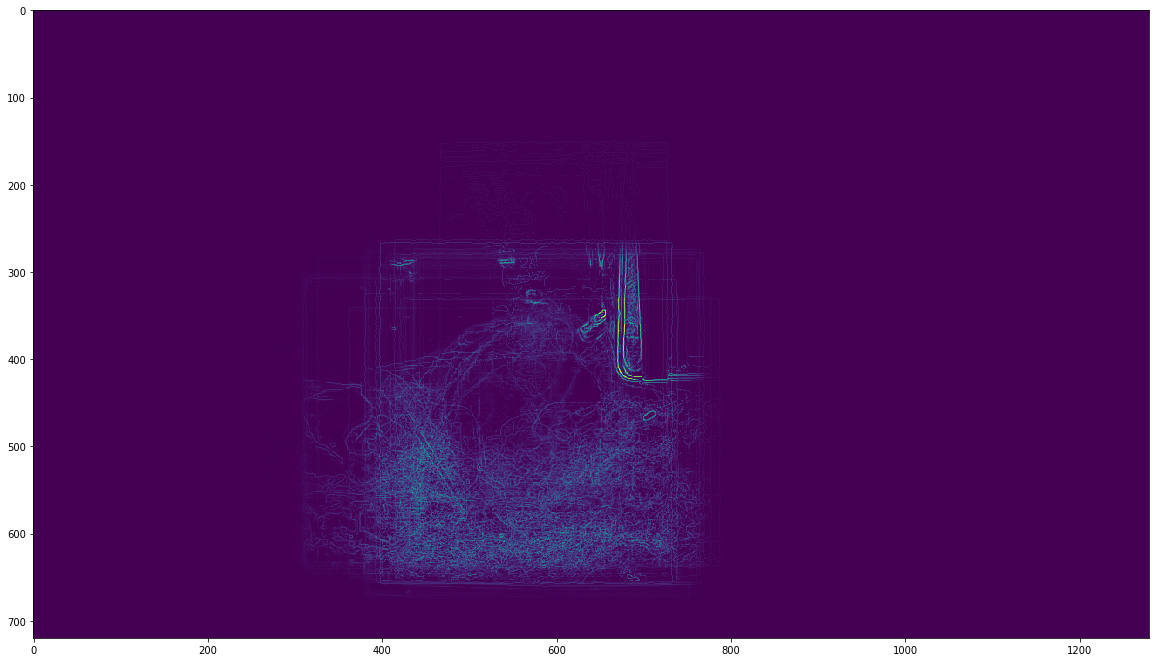

In [419]:
plt.figure(figsize=(20,20))
plt.imshow(mean_vids[0])

In [373]:
diff1 = 32
diff2 = 32

In [374]:
vid = 1965
%time frames_edge, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', diff1, diff2)

CPU times: user 15.2 s, sys: 1.24 s, total: 16.5 s
Wall time: 2.36 s


In [375]:
vid = 2349
%time frames_edge2, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', diff1, diff2)
vid = 2353
%time frames_edge3, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', diff1, diff2)
vid = 1260
%time frames_edge4, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', diff1, diff2)
vid = 3235
%time frames_edge5, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', diff1, diff2)
vid = 2363
%time frames_edge6, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', diff1, diff2)
vid = 3274
%time frames_edge7, n_f, n_H, n_W, n_C = frames_edges('/home/pn/Desktop/deeplabcut/data_time_series/best_videos/'+str(vid)+'.avi', diff1, diff2)

CPU times: user 19.4 s, sys: 1.31 s, total: 20.7 s
Wall time: 2.88 s
CPU times: user 27.8 s, sys: 2.32 s, total: 30.1 s
Wall time: 4.21 s
CPU times: user 17.4 s, sys: 1.64 s, total: 19 s
Wall time: 2.9 s
CPU times: user 12.5 s, sys: 1.24 s, total: 13.7 s
Wall time: 2.11 s
CPU times: user 12.3 s, sys: 1.16 s, total: 13.5 s
Wall time: 2.11 s
CPU times: user 20.2 s, sys: 1.7 s, total: 21.9 s
Wall time: 3.31 s


In [376]:
frames_edge.shape

(245, 720, 1280)

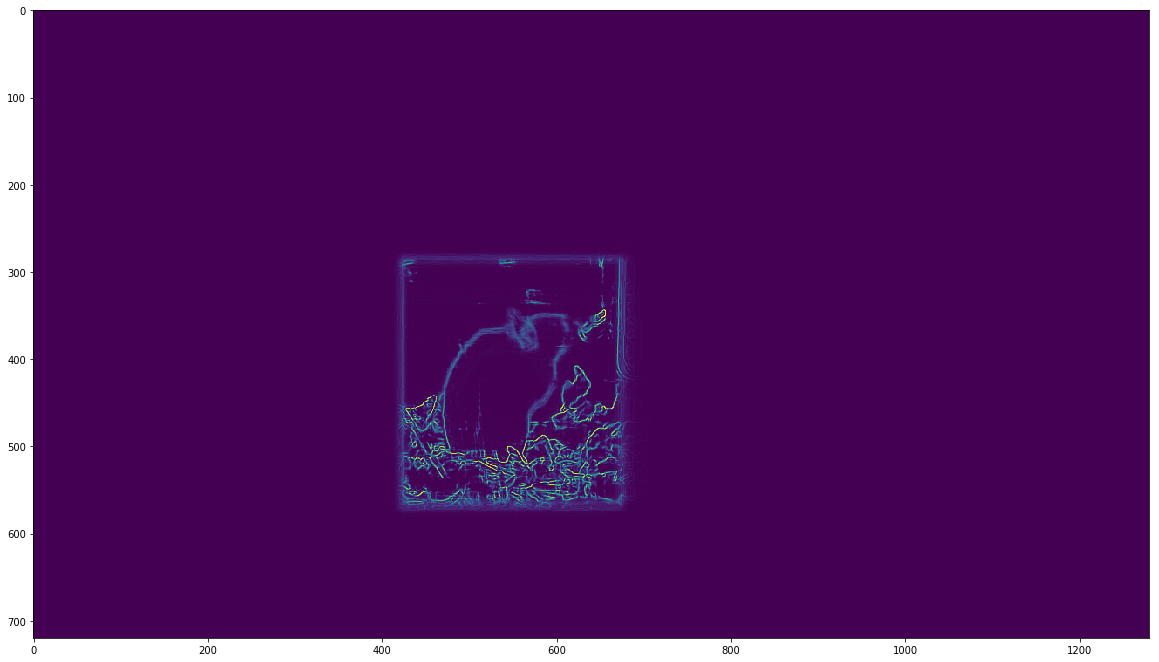

In [377]:
plt.figure(figsize=(20,20))
plt.imshow(frames_edge.mean(axis=0))

In [382]:
frames = np.stack((frames_edge.mean(axis=0), frames_edge2.mean(axis=0), frames_edge3.mean(axis=0), frames_edge4.mean(axis=0), frames_edge5.mean(axis=0), frames_edge6.mean(axis=0), frames_edge7.mean(axis=0)))

In [387]:
frames.shape

(7, 720, 1280)

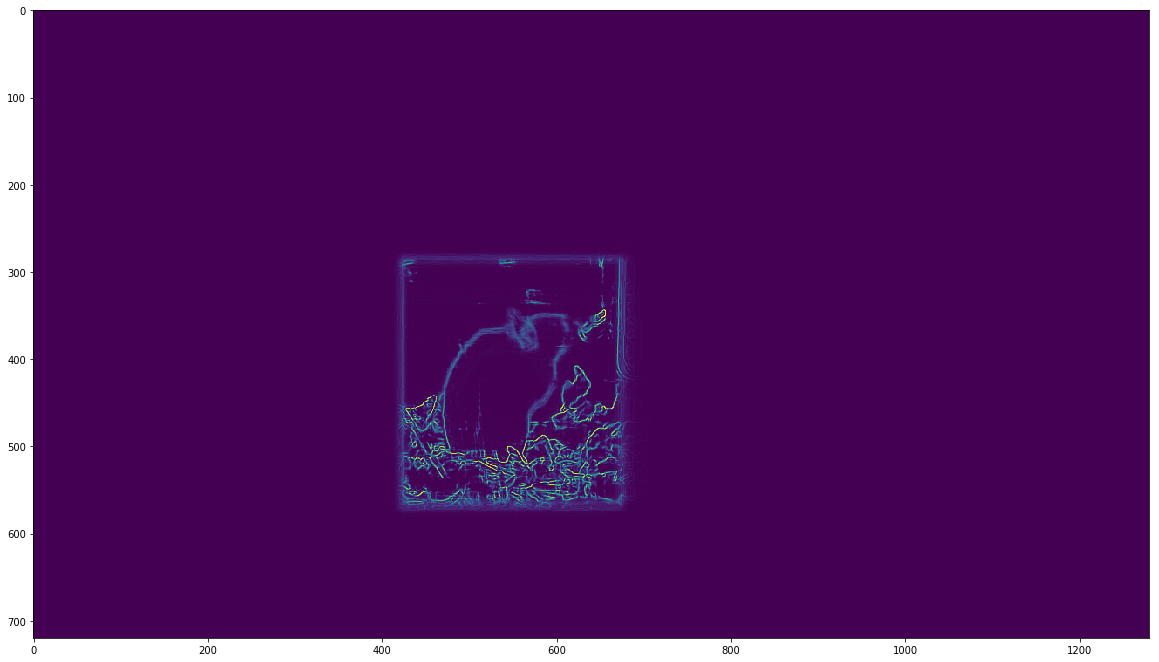

In [385]:
plt.figure(figsize=(20,20))
plt.imshow(frames[0])

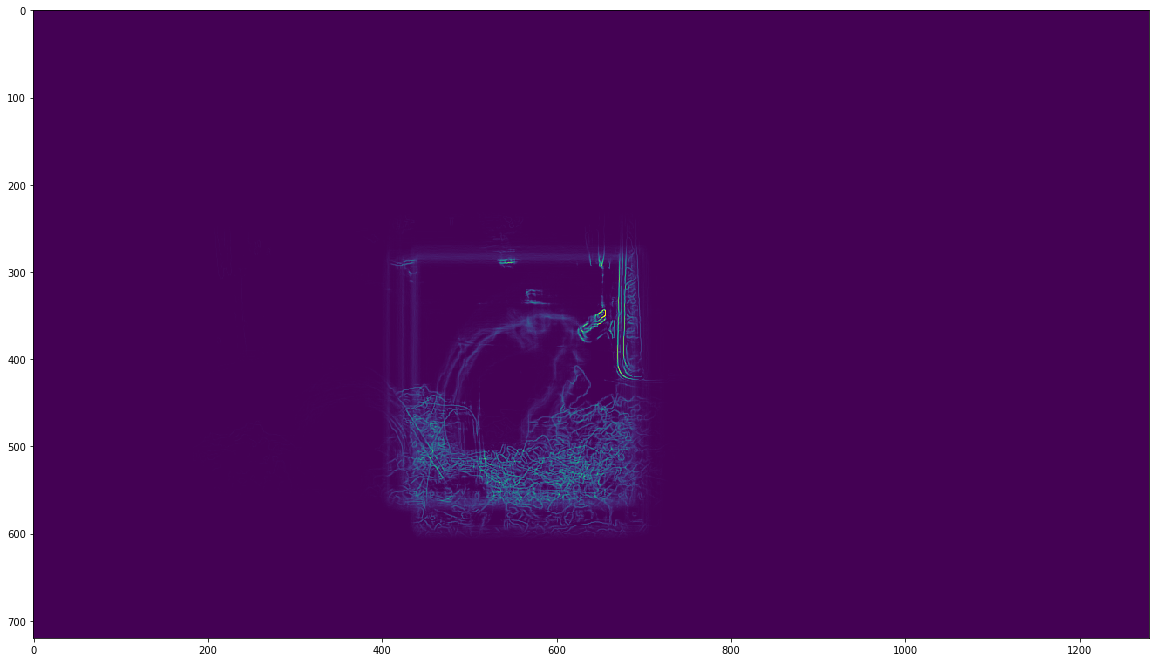

In [359]:
plt.figure(figsize=(20,20))
plt.imshow(frames.mean(axis=0))

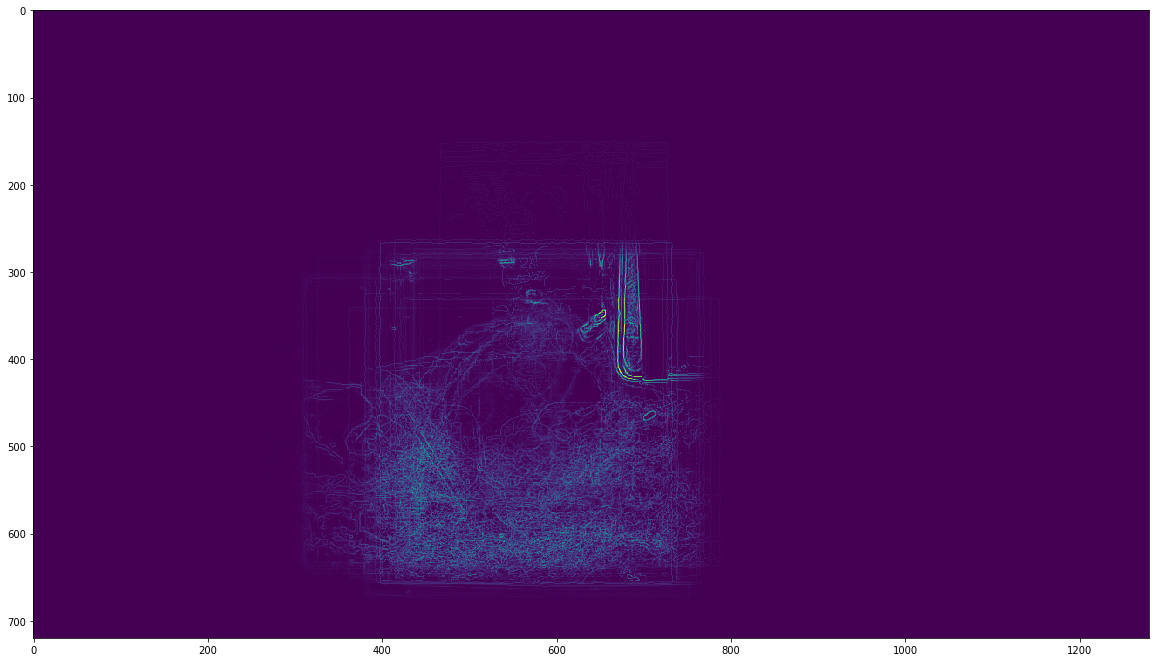

In [504]:
plt.figure(figsize=(20,20))
plt.imshow(mean_vids[0])

In [395]:
frames = frames.mean(axis=0)

In [490]:
mean_vids.shape

(60, 720, 1280)

In [495]:
mean_vids.max()

2740.0

In [496]:
video = []
for i in range(0, len(mean_vids)):
    video.append(cv2.cvtColor(np.uint8(mean_vids[i]*255/mean_vids.max()), cv2.COLOR_GRAY2RGB))

In [497]:
video = np.stack(video)

In [498]:
video[0].shape

(720, 1280, 3)

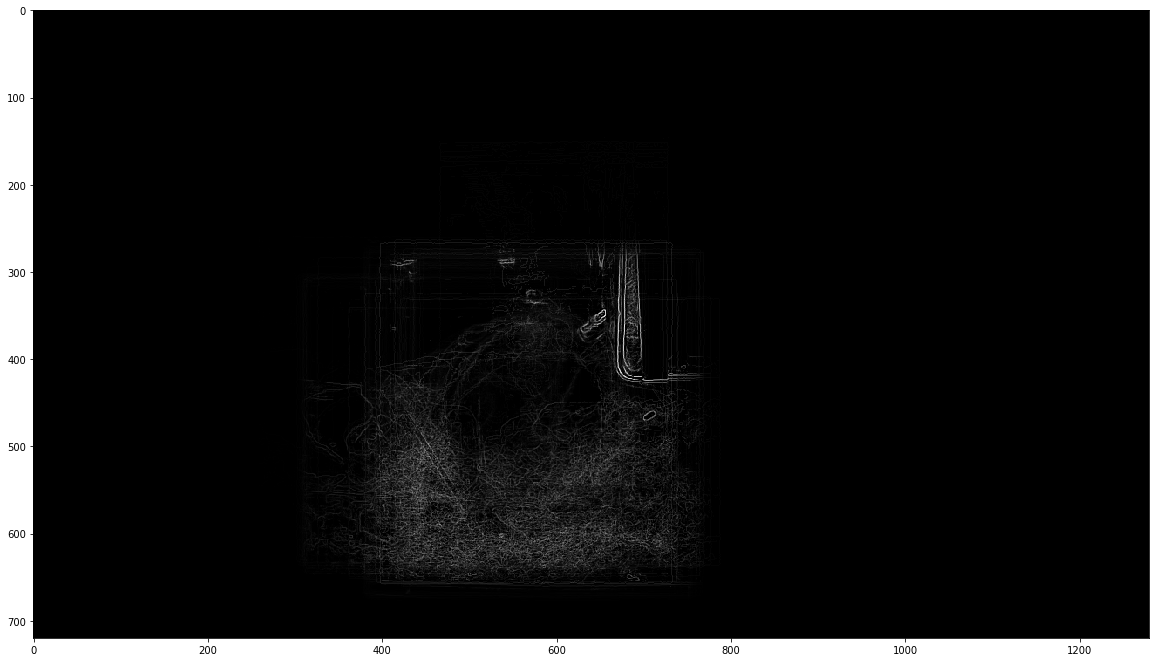

In [499]:
plt.figure(figsize=(20,20))
plt.imshow(video[0])

In [502]:
out = cv2.VideoWriter('project10.avi', cv2.VideoWriter_fourcc(*'PIM1'), 25, (1280, 720))

In [503]:
for i in range(len(mean_vids)):
    out.write(np.uint8(video[i]))

In [ ]:
for i in range(0,60):
    cv2.imwrite('frames/color'+str(i)+'.jpg', mean_vids[i])

## Background Subtraction

In [19]:
import cv2
import numpy as np

In [33]:
cap = cv2.VideoCapture('8.9_9.0_0.9_1.0.avi')

In [2]:
cap = cv2.VideoCapture('5_10_-16_-12.avi')

In [2]:
cap = cv2.VideoCapture('8.5_9.5_0.5_1.5.avi')

In [35]:
fgbg = cv2.createBackgroundSubtractorMOG2()
out = cv2.VideoWriter('subtracted.avi', cv2.VideoWriter_fourcc(*'PIM1'), 25, (1280, 720))

video = []
while(1):
    print('here')
    success, frame = cap.read()
    
    if success == False:
        break
        
    fgmask = fgbg.apply(frame)
    
    print(fgmask.shape)
    
    out_frame = cv2.cvtColor(np.uint8(fgmask), cv2.COLOR_GRAY2RGB)
    
    print(out_frame.shape)
    
    out.write(np.uint8(out_frame))
    #video.append(fgmask)
    
    #cv2.imshow('frame', fgmask)
    #k = cv2.waitKey(30) & 0xff

        

here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(720, 1280)
(720, 1280, 3)
here
(72

In [42]:
corners = ((7.95,8.1,-2.85,-2.775), (8.5, 9.5, 0.5, 1.5), (8.9, 9.0, 0.9, 1.0), (8.7, 9.7, 0.5, 1.5), (-15, -10, -5, 0), (5, 10, -16, -12), (4, 8, -9, -6), (8, 10, 8, 10))
for x_min, x_max, y_min, y_max in corners:
    background_subtraction(x_min, x_max, y_min, y_max)

In [41]:
def background_subtraction(x_min, x_max, y_min, y_max):

    cap = cv2.VideoCapture(str(x_min)+'_'+str(x_max)+'_'+str(y_min)+'_'+str(y_max)+'.avi')
    fgbg = cv2.createBackgroundSubtractorMOG2()
    out = cv2.VideoWriter(str(x_min)+'_'+str(x_max)+'_'+str(y_min)+'_'+str(y_max)+'_subtracted.avi', cv2.VideoWriter_fourcc(*'PIM1'), 25, (1280, 720))
    while(1):
        success, frame = cap.read()
        if success == False:
            break

        fgmask = fgbg.apply(frame)
        out_frame = cv2.cvtColor(np.uint8(fgmask), cv2.COLOR_GRAY2RGB)

        out.write(np.uint8(out_frame))